# <비율컬럼 추가>

In [1249]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [1250]:
df = pd.read_csv('test.csv')

In [1251]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 85)

pandas version:  1.2.5


In [1252]:
df.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수']

# 1. 데이터 오류 처리

In [1253]:
error_list=['C2335', 'C1327', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988', 'C2085', 'C1397', 'C2431', 'C1649', 'C1036', 'C2675'] 
len(error_list)

15

In [1254]:
df.단지코드.nunique()

150

In [1255]:
code_list = [i for i in df.단지코드.unique() if i not in error_list]
len(code_list)

147

In [1256]:
df_r = pd.DataFrame()

for i in code_list:
    temp = df[df.단지코드 == i]
    df_r = pd.concat([df_r, temp])
df = df_r

In [1257]:
error_list2 =  ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
len(error_list2)

10

In [1258]:
code_list2 = [i for i in df.단지코드.unique() if i not in error_list2]
len(code_list2)

146

In [1259]:
df_r = pd.DataFrame()

for i in code_list2:
    temp = df[df.단지코드 == i]
    df_r = pd.concat([df_r, temp])
    
df = df_r

In [1260]:
df_r.to_csv('data/train_0_semi.csv')

In [1261]:
df = df_r.copy()

In [1262]:
df.단지코드.nunique()

146

In [1263]:
df.shape

(1004, 14)

In [1264]:
len(df.loc[(df['임대료'].isnull()) | (df['임대보증금'].isnull()) |
      (df['임대료'] == '-') | (df['임대보증금'] == '-')])

186

In [1265]:
df.loc[(df['임대료'].isnull()) | (df['임대보증금'].isnull()) |
      (df['임대료'] == '-') | (df['임대보증금'] == '-')].단지코드.unique()

array(['C1006', 'C2676', 'C2177', 'C2033', 'C1812', 'C2253', 'C1729',
       'C2152', 'C1267'], dtype=object)

In [1266]:
# 임대료 문제 단지들

pricelist = ['C1006', 'C2676', 'C2177', 'C2033', 'C1812', 'C2253', 'C1729',
       'C2152', 'C1267']

In [1267]:
df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [1268]:
df = df.replace('-', np.NaN)


In [1269]:
df_r = pd.DataFrame()

for i in pricelist:
    temp = df[df.단지코드 == i]
    df_r = pd.concat([df_r, temp])
    
df_r

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수
73,C1006,1505,아파트,대전광역시,영구임대,26.37,358,27.0,C,5787000,79980,2.0,5.0,428.0
74,C1006,1505,아파트,대전광역시,영구임대,26.37,229,27.0,C,5787000,79980,2.0,5.0,428.0
75,C1006,1505,아파트,대전광역시,영구임대,26.37,574,27.0,C,5787000,79980,2.0,5.0,428.0
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,C1267,675,아파트,경상남도,영구임대,22.86,14,38.0,C,10876000,89230,0.0,1.0,467.0
1014,C1267,675,아파트,경상남도,행복주택,16.94,50,38.0,L,NaN,NaN,0.0,1.0,467.0
1015,C1267,675,아파트,경상남도,행복주택,26.85,66,38.0,L,NaN,NaN,0.0,1.0,467.0
1016,C1267,675,아파트,경상남도,행복주택,26.85,8,38.0,L,NaN,NaN,0.0,1.0,467.0


In [1270]:
df_p = pd.DataFrame()

normal = [x for x in df.단지코드.unique() if x not in pricelist]

for i in normal:
    temp = df[df.단지코드 == i]
    df_p = pd.concat([df_p, temp])
df_p

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,C1266,596,아파트,충청북도,국민임대,46.33,107,35.0,H,24190000,274570,0.0,1.0,593.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [1271]:
df_r[df_r.임대건물구분 == '상가']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0
82,C1006,1505,상가,대전광역시,임대상가,37.26,1,27.0,D,NaN,NaN,2.0,5.0,428.0
83,C1006,1505,상가,대전광역시,임대상가,37.41,1,27.0,D,NaN,NaN,2.0,5.0,428.0
84,C1006,1505,상가,대전광역시,임대상가,37.41,1,27.0,D,NaN,NaN,2.0,5.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,NaN,0.0,5.0,131.0
329,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,NaN,0.0,5.0,131.0
330,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,NaN,0.0,5.0,131.0
331,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,NaN,0.0,5.0,131.0


In [1272]:
store_null = [x for x in df_r[df_r.임대건물구분 == '상가'].단지코드.unique()]
store_null

['C1006', 'C2676', 'C2177', 'C2033', 'C1812', 'C2253', 'C1729']

In [1273]:
store_null.remove('C1006')

In [1274]:
store_null

['C2676', 'C2177', 'C2033', 'C1812', 'C2253', 'C1729']

In [1275]:
df_store = pd.DataFrame()

for i in store_null:
    temp = df_r[df_r.단지코드 == i]
    df_store = pd.concat([df_store, temp])

df_store

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수
113,C2676,2572,아파트,부산광역시,영구임대,26.37,294,25.0,C,5787000,79980,0.0,2.0,418.0
114,C2676,2572,아파트,부산광역시,영구임대,26.37,1341,25.0,C,5787000,79980,0.0,2.0,418.0
115,C2676,2572,아파트,부산광역시,영구임대,31.32,894,25.0,C,6873000,94990,0.0,2.0,418.0
116,C2676,2572,상가,부산광역시,임대상가,15.00,1,25.0,D,NaN,NaN,0.0,2.0,418.0
117,C2676,2572,상가,부산광역시,임대상가,15.00,1,25.0,D,NaN,NaN,0.0,2.0,418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,NaN,0.0,5.0,131.0
329,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,NaN,0.0,5.0,131.0
330,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,NaN,0.0,5.0,131.0
331,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,NaN,0.0,5.0,131.0


In [1276]:
df_ap = pd.DataFrame()

apt_null = [x for x in df_r[(df_r.임대건물구분 == '아파트') & ((df_r.임대료 == '-') | (df_r.임대료.isnull()))].단지코드.unique()]

for i in apt_null:
    temp = df_r[df_r.단지코드 == i]
    df_ap = pd.concat([df_ap, temp])

df_ap

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수
73,C1006,1505,아파트,대전광역시,영구임대,26.37,358,27.0,C,5787000,79980,2.0,5.0,428.0
74,C1006,1505,아파트,대전광역시,영구임대,26.37,229,27.0,C,5787000,79980,2.0,5.0,428.0
75,C1006,1505,아파트,대전광역시,영구임대,26.37,574,27.0,C,5787000,79980,2.0,5.0,428.0
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
78,C1006,1505,아파트,대전광역시,영구임대,31.32,298,27.0,C,6873000,94990,2.0,5.0,428.0
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0
82,C1006,1505,상가,대전광역시,임대상가,37.26,1,27.0,D,NaN,NaN,2.0,5.0,428.0


In [1277]:
temp = df_ap[~(df_ap['임대료'].isnull()) & (df_ap['임대료']!='-')]

temp = temp.astype({'임대보증금': 'int',
                   '임대료':'int'})

temp['가격'] = temp['임대보증금'] + (100* temp['임대료'])
temp['면적대비가격'] = temp['가격'] / temp['전용면적']

temp1 = temp.groupby('단지코드').mean()[['면적대비가격']].reset_index()

In [1278]:
temp1

,단지코드,면적대비가격
0,C1006,522748.115893
1,C1267,828358.984113


In [1279]:
df_ap['면적대비가격'] = np.where(df_ap['단지코드'] == 'C1006',
                          temp1.loc[temp1.단지코드 == 'C1006'].면적대비가격,
                          temp1.loc[temp1.단지코드 == 'C1267'].면적대비가격)

In [1280]:
df_store

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수
113,C2676,2572,아파트,부산광역시,영구임대,26.37,294,25.0,C,5787000,79980,0.0,2.0,418.0
114,C2676,2572,아파트,부산광역시,영구임대,26.37,1341,25.0,C,5787000,79980,0.0,2.0,418.0
115,C2676,2572,아파트,부산광역시,영구임대,31.32,894,25.0,C,6873000,94990,0.0,2.0,418.0
116,C2676,2572,상가,부산광역시,임대상가,15.00,1,25.0,D,NaN,NaN,0.0,2.0,418.0
117,C2676,2572,상가,부산광역시,임대상가,15.00,1,25.0,D,NaN,NaN,0.0,2.0,418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,NaN,0.0,5.0,131.0
329,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,NaN,0.0,5.0,131.0
330,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,NaN,0.0,5.0,131.0
331,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,NaN,0.0,5.0,131.0


In [1281]:
temp = df_store[~(df_store['임대료'].isnull()) & (df_store['임대료']!='-')]

temp = temp.astype({'임대보증금': 'int',
                   '임대료':'int'})

temp['가격'] = temp['임대보증금'] + (100* temp['임대료'])
temp['면적대비가격'] = temp['가격'] / temp['전용면적']

temp1 = temp.groupby('단지코드').mean()[['면적대비가격']].reset_index()

In [1282]:
temp1

,단지코드,면적대비가격
0,C1729,436799.993792
1,C1812,424925.409404
2,C2033,436784.224498
3,C2177,384189.517869
4,C2253,341151.125234
5,C2676,522746.445005


In [1283]:
df_store = df_store.merge(temp1, on = '단지코드', how = 'left')

In [1284]:
temp = df_p.copy()

temp = temp.astype({'임대보증금': 'int',
                   '임대료':'int'})

temp['가격'] = temp['임대보증금'] + (100* temp['임대료'])
temp['면적대비가격'] = temp['가격'] / temp['전용면적']

temp1 = temp.groupby('단지코드').mean()[['면적대비가격']].reset_index()

In [1285]:
temp1

,단지코드,면적대비가격
0,C1003,1.072986e+06
1,C1016,9.725325e+05
2,C1019,6.119005e+05
3,C1030,2.803778e+06
4,C1038,2.262595e+06
...,...,...
132,C2608,8.476272e+05
133,C2646,8.500458e+05
134,C2653,8.886726e+05
135,C2688,6.285872e+05


In [1286]:
df_p = df_p.merge(temp1, on = '단지코드', how = 'left')

<AxesSubplot:xlabel='면적대비가격'>

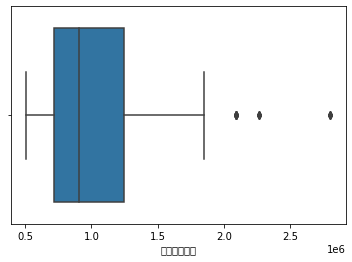

In [1287]:
sns.boxplot(df_p.면적대비가격)

<AxesSubplot:xlabel='면적대비가격'>

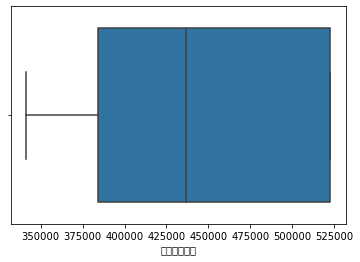

In [1288]:
sns.boxplot(df_store.면적대비가격)

<AxesSubplot:xlabel='면적대비가격'>

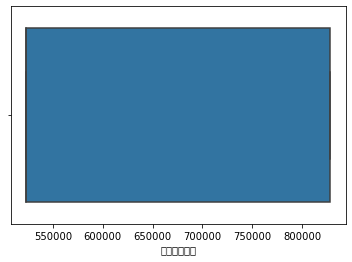

In [1289]:
sns.boxplot(df_ap.면적대비가격)

In [1290]:
df_ap

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수,면적대비가격
73,C1006,1505,아파트,대전광역시,영구임대,26.37,358,27.0,C,5787000,79980,2.0,5.0,428.0,522748.115893
74,C1006,1505,아파트,대전광역시,영구임대,26.37,229,27.0,C,5787000,79980,2.0,5.0,428.0,522748.115893
75,C1006,1505,아파트,대전광역시,영구임대,26.37,574,27.0,C,5787000,79980,2.0,5.0,428.0,522748.115893
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0,522748.115893
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0,522748.115893
78,C1006,1505,아파트,대전광역시,영구임대,31.32,298,27.0,C,6873000,94990,2.0,5.0,428.0,522748.115893
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0,522748.115893
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0,522748.115893
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0,522748.115893
82,C1006,1505,상가,대전광역시,임대상가,37.26,1,27.0,D,NaN,NaN,2.0,5.0,428.0,522748.115893


In [1291]:
df_store.shape, df_p.shape, df_ap.shape

((179, 15), (785, 15), (40, 15))

In [1292]:
df = pd.concat([df_p, df_store, df_ap]).reset_index(drop =True)

In [1293]:
179+789+40

1008

# 2.결측치 처리

In [1294]:
df['임대료'] = df.임대료.replace('-', np.nan)
df['임대보증금'] = df.임대보증금.replace('-', np.nan)

In [1295]:
df['임대료'] = df['임대료'].fillna(0)
df['임대보증금'] = df['임대보증금'].fillna(0)

### 지하철역수
- 대전은 1, 충청남도는 0

In [1296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      1004 non-null   object 
 1   총세대수      1004 non-null   int64  
 2   임대건물구분    1004 non-null   object 
 3   지역        1004 non-null   object 
 4   공급유형      1004 non-null   object 
 5   전용면적      1004 non-null   float64
 6   전용면적별세대수  1004 non-null   int64  
 7   공가수       1004 non-null   float64
 8   자격유형      1002 non-null   object 
 9   임대보증금     1004 non-null   object 
 10  임대료       1004 non-null   object 
 11  지하철역      966 non-null    float64
 12  버스정류장     1004 non-null   float64
 13  단지내주차면수   1004 non-null   float64
 14  면적대비가격    1004 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 117.8+ KB


In [1297]:
df.loc[df['지하철역'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수,면적대비가격
68,C1472,548,아파트,충청남도,국민임대,36.62,116,2.0,A,8738000,87380,NaN,1.0,442.0,553104.148684
69,C1472,548,아파트,충청남도,국민임대,39.51,56,2.0,A,9985000,99850,NaN,1.0,442.0,553104.148684
70,C1472,548,아파트,충청남도,국민임대,46.79,56,2.0,A,13731000,131070,NaN,1.0,442.0,553104.148684
71,C1472,548,아파트,충청남도,국민임대,46.90,86,2.0,A,13731000,131070,NaN,1.0,442.0,553104.148684
72,C1472,548,아파트,충청남도,국민임대,51.93,234,2.0,A,18726000,143550,NaN,1.0,442.0,553104.148684
73,C1083,427,아파트,대전광역시,국민임대,39.85,40,0.0,A,12483000,106090,NaN,6.0,384.0,924847.712799
74,C1083,427,아파트,대전광역시,국민임대,51.48,64,0.0,A,32459000,187260,NaN,6.0,384.0,924847.712799
75,C1083,427,아파트,대전광역시,국민임대,51.99,107,0.0,A,32459000,187260,NaN,6.0,384.0,924847.712799
76,C1083,427,아파트,대전광역시,국민임대,51.99,96,0.0,A,32459000,187260,NaN,6.0,384.0,924847.712799
77,C1083,427,아파트,대전광역시,국민임대,59.45,120,0.0,A,39950000,243430,NaN,6.0,384.0,924847.712799


In [1298]:
df['지하철역'] = np.where((df.지역 =='대전광역시') & (df['지하철역'].isnull()), 1, df['지하철역'])
df['지하철역'] = np.where((df.지역 =='충청남도') & (df['지하철역'].isnull()), 0, df['지하철역'])

# 3.이상치 처리

In [1299]:
df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '면적대비가격'],
      dtype='object')

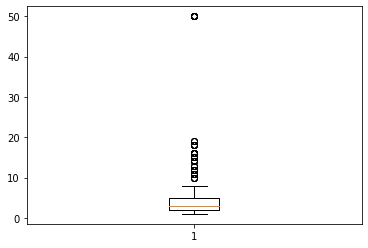

In [1300]:
plt.boxplot(df['버스정류장'])
plt.show()

In [1301]:
q25 = np.percentile(df['버스정류장'], 25)
q75 = np.percentile(df['버스정류장'], 75)
IQR = q75 - q25
df['버스정류장'] = np.where(df['버스정류장'] > 7, 7, df['버스정류장'])

In [1302]:
np.mean(df['버스정류장']) 

3.7241035856573705

(array([115., 252.,   0., 158.,   0., 134., 112.,   0.,  81., 152.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

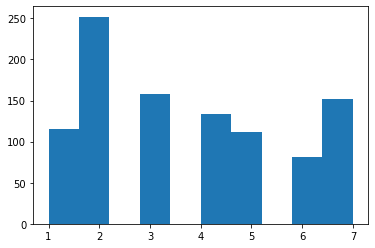

In [1303]:
plt.hist(df['버스정류장'])

In [1304]:
df.to_csv('data/test_1_semi.csv', index=False)

In [1305]:
#전처리 완료
df = pd.read_csv('data/test_1_semi.csv')

# 4.그룹

### 공급유형 그룹

In [1306]:
df['period'] = np.where((df.공급유형=='영구임대')|(df.공급유형=='공공임대(50년)')|(df.공급유형=='공공분양'), 'exL',
        np.where((df.공급유형=='국민임대')|(df.공급유형 =='장기전세'), 'L', 'S'))

In [1307]:
# from collections import Counter

(array([614.,   0.,   0.,   0.,   0.,  56.,   0.,   0.,   0., 334.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

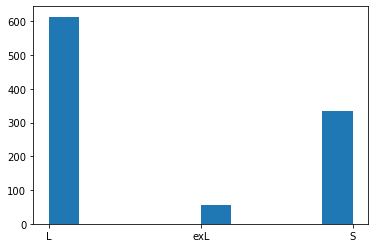

In [1308]:
plt.hist(df.period)

### 자격유형 그룹

In [1309]:
ls=[]
for i in df.공급유형.unique():
    temp = df[df.공급유형 == i]
    cert = temp.자격유형.unique()
    ls.append([i, cert])

- A : 공공임대(50년), 공공임대(10년), 공공임대(분납), 장기전세, 공공임대(5년) - 
- D : 임대상가, 공공분양 - 
- A, C, E, F, I : 영구임대
- J, K, L, M, N, O : 행복주택
- A, B, E, G, H : 국민임대

In [1310]:
df['자격유형_cat'] = np.where(df.공급유형 =='행복주택', 'JKLMNO',
        np.where(df.공급유형 == '국민임대', 'ABEGH',
                np.where(df.공급유형 =='영구임대', 'ACEFI',
                        np.where((df.공급유형 =='임대상가') | (df.공급유형 =='공공분양'), 'D', 'A'))))

In [1311]:
df['자격유형_cat'].unique()

array(['ABEGH', 'A', 'ACEFI', 'JKLMNO', 'D'], dtype=object)

(array([614.,   0.,  50.,   0.,   0.,  43.,   0., 120.,   0., 177.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

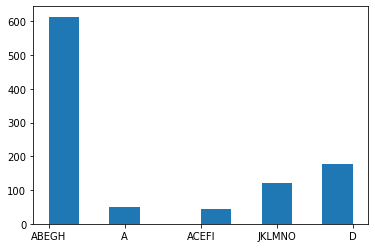

In [1312]:
plt.hist(df['자격유형_cat'])

### 전용면적 그룹
- 상한선 80, 하한선 15

In [1313]:
df.전용면적.describe()

count    1004.000000
mean       43.694173
std        36.143472
min         9.960000
25%        33.145000
50%        39.720000
75%        46.985000
max       583.400000
Name: 전용면적, dtype: float64

In [1314]:
df['전용면적'] = df.전용면적//5 *5

In [1315]:
df.전용면적 = np.where(df.전용면적 > 80, 80,
        np.where(df.전용면적 < 15, 15, df.전용면적))
df.전용면적 = df.전용면적.astype('int64')

In [1316]:
df.전용면적.describe()

count    1004.000000
mean       38.515936
std        13.159378
min        15.000000
25%        30.000000
50%        35.000000
75%        45.000000
max        80.000000
Name: 전용면적, dtype: float64

(array([109., 129.,  41., 285., 205., 136.,  66.,   0.,   6.,  27.]),
 array([15. , 21.5, 28. , 34.5, 41. , 47.5, 54. , 60.5, 67. , 73.5, 80. ]),
 <BarContainer object of 10 artists>)

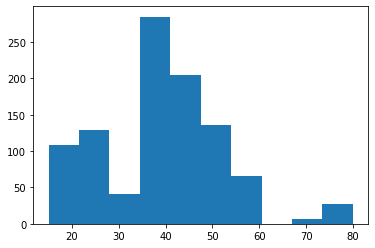

In [1317]:
plt.hist(df.전용면적)

In [1318]:
df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수,면적대비가격,period,자격유형_cat
0,C1072,754,아파트,경기도,국민임대,35,116,14.0,H,22830000,189840,0.0,2.0,683.0,1.326448e+06,L,ABEGH
1,C1072,754,아파트,경기도,국민임대,45,30,14.0,A,36048000,249930,0.0,2.0,683.0,1.326448e+06,L,ABEGH
2,C1072,754,아파트,경기도,국민임대,45,112,14.0,H,36048000,249930,0.0,2.0,683.0,1.326448e+06,L,ABEGH
3,C1072,754,아파트,경기도,국민임대,45,120,14.0,H,36048000,249930,0.0,2.0,683.0,1.326448e+06,L,ABEGH
4,C1072,754,아파트,경기도,국민임대,50,60,14.0,H,43497000,296780,0.0,2.0,683.0,1.326448e+06,L,ABEGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,C1267,675,아파트,경상남도,영구임대,20,14,38.0,C,10876000,89230,0.0,1.0,467.0,8.283590e+05,exL,ACEFI
1000,C1267,675,아파트,경상남도,행복주택,15,50,38.0,L,0,0,0.0,1.0,467.0,8.283590e+05,S,JKLMNO
1001,C1267,675,아파트,경상남도,행복주택,25,66,38.0,L,0,0,0.0,1.0,467.0,8.283590e+05,S,JKLMNO
1002,C1267,675,아파트,경상남도,행복주택,25,8,38.0,L,0,0,0.0,1.0,467.0,8.283590e+05,S,JKLMNO


# 5. 데이터프레임 만들기 시작

In [1319]:
df1 = pd.DataFrame(df.단지코드.unique(), columns = ['단지코드'])

In [1320]:
df1

,단지코드
0,C1072
1,C1128
2,C1456
3,C1840
4,C1332
...,...
141,C2253
142,C1729
143,C1006
144,C2152


## 1) 임대건물구분

### 아파트/상가 세대수

temp1 = data[['단지코드', '총세대수']].drop_duplicates()
df1 = temp.merge(df1, on = '단지코드', how = 'left')

In [1321]:
temp1 = df.groupby(['단지코드','총세대수']).sum()['전용면적별세대수'].reset_index()

14개 이하 상가 빠졌다고 함

In [1322]:
df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '면적대비가격', 'period',
       '자격유형_cat'],
      dtype='object')

In [1323]:
temp1['세대수합차이'] = temp1['총세대수'] - temp1['전용면적별세대수']

In [1324]:
temp1

,단지코드,총세대수,전용면적별세대수,세대수합차이
0,C1003,480,480,0
1,C1006,1505,1505,0
2,C1016,643,643,0
3,C1019,321,321,0
4,C1030,75,70,5
...,...,...,...,...
141,C2646,584,584,0
142,C2653,879,879,0
143,C2676,2572,2572,0
144,C2688,150,150,0


bigdif = ['C1490', 'C2497', 'C2620', 'C1344', 
          'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']

df1['상가비율'] = df1['상가세대수']/df1['총세대수']
df1['아파트비율'] = df1['아파트세대수']/df1['총세대수']

df1.loc[df1['세대수합차이'] == 0].mean(), df1.loc[df1['단지코드'].isin(bigdif)].mean()

### 부족치 대부분이 아파트임을 비율상 유추할 수 있다. 따라서 아파트로 채움

df1['아파트세대수'] = np.where(df1['세대수합차이']>0, df1['아파트세대수']+df1['세대수합차이'],
                        df1['아파트세대수'])

In [1325]:
df1 = pd.DataFrame(df.단지코드.unique(), columns = ['단지코드'])

temp = df.groupby(['단지코드', '임대건물구분']).sum()['전용면적별세대수'].reset_index()

df1 = df1.merge(temp.loc[temp['임대건물구분'] == '아파트'].reset_index(drop=True)[['단지코드','전용면적별세대수']], on = '단지코드', how = 'left')

df1.columns = ['단지코드','아파트세대수']

df1 = df1.merge(temp.loc[temp['임대건물구분'] == '상가'].reset_index(drop=True)[['단지코드','전용면적별세대수']], on = '단지코드', how = 'left' )

df1.columns = ['단지코드','아파트세대수', '상가세대수']

df1 = df1.fillna(0)

df1 = df1.merge(temp1, on = '단지코드')

In [1326]:
df1 = df1.merge(temp1, on = '단지코드')

<AxesSubplot:xlabel='세대수합차이'>

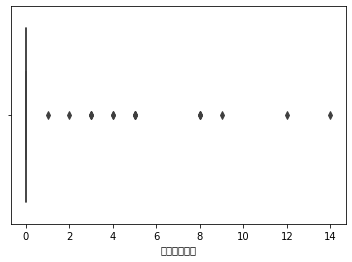

In [1327]:
sns.boxplot(df1.세대수합차이)

In [1328]:
df1.loc[df1.세대수합차이 > 100]

,단지코드,아파트세대수,상가세대수,총세대수,전용면적별세대수,세대수합차이


In [1329]:
df1.loc[df1.세대수합차이 > 0]

,단지코드,아파트세대수,상가세대수,총세대수,전용면적별세대수,세대수합차이
16,C2411,961,0.0,962,961,1
120,C1030,70,0.0,75,70,5
122,C1749,840,0.0,848,840,8
123,C1349,460,0.0,465,460,5
124,C2043,460,0.0,469,460,9
125,C1229,450,0.0,453,450,3
126,C2363,856,0.0,864,856,8
127,C1414,870,0.0,873,870,3
128,C2174,946,0.0,954,946,8
131,C2404,200,0.0,214,200,14


In [1330]:
df.loc[df.단지코드 == 'C2497']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철역,버스정류장,단지내주차면수,면적대비가격,period,자격유형_cat


In [1331]:
df1['세대수합차이'] = df1['총세대수'] - df1['아파트세대수'] - df1['상가세대수']
df1['상가세대수'] = np.where((df1['세대수합차이'] != 0) & (df1['세대수합차이'] <= 14),
                       df1['상가세대수']+df1['세대수합차이'], df1['상가세대수'])

df1.drop(['세대수합차이', '상가비율','아파트비율'], axis = 1, inplace = True)

In [1332]:
df1['아파트세대수'] =  np.where(df1['세대수합차이'] > 100,
                       df1['아파트세대수']+df1['세대수합차이'], df1['아파트세대수'])

In [1333]:
df1['상가비율'] = df1['상가세대수']/df1['총세대수']
df1['아파트비율'] = df1['아파트세대수']/df1['총세대수']

In [1334]:
df1.drop(['아파트세대수','상가세대수','전용면적별세대수','세대수합차이','아파트비율'], axis = 1, inplace = True)

In [1335]:
df1

,단지코드,총세대수,상가비율
0,C1072,754,0.000000
1,C1128,1354,0.000000
2,C1456,619,0.000000
3,C1840,593,0.000000
4,C1332,1297,0.000000
...,...,...,...
141,C2253,1161,0.024117
142,C1729,627,0.027113
143,C1006,1505,0.013289
144,C2152,120,0.000000


df1 = pd.DataFrame(df.단지코드.unique(), columns = ['단지코드'])

temp = df.groupby(['단지코드', '임대건물구분']).sum()['전용면적별세대수'].reset_index()

df1 = df1.merge(temp.loc[temp['임대건물구분'] == '아파트'].reset_index(drop=True)[['단지코드','전용면적별세대수']], on = '단지코드', how = 'left')

df1.columns = ['단지코드','아파트세대수']

df1 = df1.merge(temp.loc[temp['임대건물구분'] == '상가'].reset_index(drop=True)[['단지코드','전용면적별세대수']], on = '단지코드', how = 'left' )

df1.columns = ['단지코드','아파트세대수', '상가세대수']

df1 = df1.fillna(0)

df1

df1['상가세대수'] = np.where((df1['세대수합차이'] != 0) & (df1['세대수합차이'] <= 14),
                       df1['상가세대수']+df1['세대수합차이'], df1['상가세대수'])

bigdif = ['C1490', 'C2497', 'C2620', 'C1344', 
          'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']

df1['상가비율'] = df1['상가세대수']/df1['총세대수']
df1['아파트비율'] = df1['아파트세대수']/df1['총세대수']

df1.loc[df1['세대수합차이'] == 0].mean(), df1.loc[df1['단지코드'].isin(bigdif)].mean()

### 부족치 대부분이 아파트임을 비율상 유추할 수 있다. 따라서 아파트로 채움

df1['아파트세대수'] = np.where(df1['세대수합차이']>0, df1['아파트세대수']+df1['세대수합차이'],
                        df1['아파트세대수'])

df1

### 총세대수 & 아파트/상가 비율

In [1336]:
# temp = df[['단지코드', '총세대수']].drop_duplicates() #총세대수
# df1 = df1.merge(temp, on='단지코드', how='left')

df1['총세대수'] = df1['아파트세대수'] + df1['상가세대수']

df1['아파트비율'] = df1['아파트세대수']/df1['총세대수']
df1['상가비율'] = df1['상가세대수']/df1['총세대수']

df1 = df1.drop(['아파트세대수', '상가세대수'], axis=1)

## 2) 기본정보 ★

In [1337]:
#제외 : 총세대수, 임대건물구분(df1), 전용면적별세대수, 전용면적, 공급유형, 자격유형
#포함 : 총세대수, 단지코드, 지역, 공가수, 도보 10분거리 내 지하철역 수(환승노선 수 반영),  도보 10분거리 내 버스정류장 수, 단지내주차면수, 등록차량수

In [1338]:
df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철역', '버스정류장', '단지내주차면수', '면적대비가격', 'period',
       '자격유형_cat'],
      dtype='object')

In [1339]:
df.groupby(['단지코드', '지역', '공가수', '지하철역',
                     '버스정류장', '단지내주차면수', 'period','자격유형_cat']).mean()

총세대수       전용면적  \
단지코드  지역      공가수  지하철역 버스정류장 단지내주차면수 period 자격유형_cat                      
C1003 경상남도    29.0 0.0  3.0   339.0   S      JKLMNO     480.0  30.000000   
C1006 대전광역시   27.0 2.0  5.0   428.0   S      D         1505.0  43.000000   
                                      exL    ACEFI     1505.0  29.285714   
C1016 경기도     4.0  1.0  4.0   646.0   L      ABEGH      643.0  45.000000   
C1019 제주특별자치도 7.0  0.0  3.0   259.0   L      ABEGH      321.0  40.000000   
...                                                       ...        ...   
C2676 부산광역시   25.0 0.0  2.0   418.0   S      D         2572.0  33.837209   
                                      exL    ACEFI     2572.0  26.666667   
C2688 전라남도    1.0  0.0  3.0   107.0   L      ABEGH      150.0  31.250000   
                                      exL    ACEFI      150.0  20.000000   
C2691 경기도     25.0 0.0  7.0   910.0   S      A          765.0  73.333333   

                                                         전용면적별세대수  \
단지코드  지역      공가수  지하철역 버스정류장 단지내주차면수 period 자격유형_cat               
C1003 경상남도    29.0 0.0  3.0   339.0   S      JKLMNO     60.000000   
C1006 대전광역시   27.0 2.0  5.0   428.0   S      D           1.000000   
                                      exL    ACEFI     212.142857   
C1016 경기도     4.0  1.0  4.0   646.0   L      ABEGH     160.750000   
C1019 제주특별자치도 7.0  0.0  3.0   259.0   L      ABEGH      80.250000   
...                                                           ...   
C2676 부산광역시   25.0 0.0  2.0   418.0   S      D           1.000000   
                                      exL    ACEFI     843.000000   
C2688 전라남도    1.0  0.0  3.0   107.0   L      ABEGH      30.000000   
                                      exL    ACEFI      15.000000   
C2691 경기도     25.0 0.0  7.0   910.0   S      A         255.000000   

                                                              임대보증금  \
단지코드  지역      공가수  지하철역 버스정류장 단지내주차면수 period 자격유형_cat                 
C1003 경상남도    29.0 0.0  3.0   339.0   S      JKLMNO    2.265000e+07   
C1006 대전광역시   27.0 2.0  5.0   428.0   S      D         0.000000e+00   
                                      exL    ACEFI     3.462000e+06   
C1016 경기도     4.0  1.0  4.0   646.0   L      ABEGH     2.402675e+07   
C1019 제주특별자치도 7.0  0.0  3.0   259.0   L      ABEGH     1.485750e+07   
...                                                             ...   
C2676 부산광역시   25.0 0.0  2.0   418.0   S      D         0.000000e+00   
                                      exL    ACEFI     6.149000e+06   
C2688 전라남도    1.0  0.0  3.0   107.0   L      ABEGH     8.198000e+06   
                                      exL    ACEFI     9.138000e+06   
C2691 경기도     25.0 0.0  7.0   910.0   S      A         7.066667e+07   

                                                                 임대료  \
단지코드  지역      공가수  지하철역 버스정류장 단지내주차면수 period 자격유형_cat                  
C1003 경상남도    29.0 0.0  3.0   339.0   S      JKLMNO    115875.000000   
C1006 대전광역시   27.0 2.0  5.0   428.0   S      D              0.000000   
                                      exL    ACEFI      47847.142857   
C1016 경기도     4.0  1.0  4.0   646.0   L      ABEGH     228010.000000   
C1019 제주특별자치도 7.0  0.0  3.0   259.0   L      ABEGH     126430.000000   
...                                                              ...   
C2676 부산광역시   25.0 0.0  2.0   418.0   S      D              0.000000   
                                      exL    ACEFI      84983.333333   
C2688 전라남도    1.0  0.0  3.0   107.0   L      ABEGH     120530.000000   
                                      exL    ACEFI      86695.000000   
C2691 경기도     25.0 0.0  7.0   910.0   S      A         560000.000000   

                                                             면적대비가격  
단지코드  지역      공가수  지하철역 버스정류장 단지내주차면수 period 자격유형_cat                
C1003 경상남도    29.0 0.0  3.0   339.0   S      JKLMNO    1.072986e+06  
C1006 대전광역시   27.0 2.0  5.0   428.0   S      D         5.227481e+05  
                             

In [1340]:
temp = df[['단지코드', '지역', '공가수', '지하철역',
                     '버스정류장', '단지내주차면수']].drop_duplicates()
df1=df1.merge(temp, on='단지코드', how='left')

In [1341]:
df1

,단지코드,총세대수,상가비율,지역,공가수,지하철역,버스정류장,단지내주차면수
0,C1072,754,0.000000,경기도,14.0,0.0,2.0,683.0
1,C1128,1354,0.000000,경기도,9.0,0.0,3.0,1216.0
2,C1456,619,0.000000,부산광역시,18.0,0.0,7.0,547.0
3,C1840,593,0.000000,전라북도,7.0,0.0,3.0,543.0
4,C1332,1297,0.000000,경기도,11.0,0.0,2.0,1112.0
...,...,...,...,...,...,...,...,...
141,C2253,1161,0.024117,강원도,0.0,0.0,2.0,173.0
142,C1729,627,0.027113,강원도,0.0,0.0,5.0,131.0
143,C1006,1505,0.013289,대전광역시,27.0,2.0,5.0,428.0
144,C2152,120,0.000000,강원도,9.0,0.0,1.0,40.0


In [1342]:
#비율만
df1.columns = ['단지코드', '총세대수', '상가비율', '지역', '공가수',
       '지하철역', '버스정류장', '단지내주차면수']

## 3) 전용면적

### 전용면적 세대수
- 10번 후에 삭제

In [1343]:
for i in df.sort_values('전용면적').전용면적.unique():
    temp = df[df.전용면적 ==i].groupby('단지코드').sum().reset_index()[['단지코드', '전용면적별세대수']]
    temp.columns = ['단지코드', '전용면적_{}_세대수'.format(i)]
    df1 = df1.merge(temp,on='단지코드', how='left')
    
df1 = df1.fillna(0)

In [1344]:
df1['전용면적_65_세대수'] = 0

### 전용면적 비율 ★

In [1345]:
ls = ['전용면적_15_세대수', '전용면적_20_세대수', '전용면적_25_세대수',
       '전용면적_30_세대수', '전용면적_35_세대수', '전용면적_40_세대수', '전용면적_45_세대수',
       '전용면적_50_세대수', '전용면적_55_세대수', '전용면적_60_세대수', '전용면적_65_세대수',
       '전용면적_70_세대수', '전용면적_75_세대수', '전용면적_80_세대수']

In [1346]:
ls1 = df.sort_values('전용면적').전용면적.unique()
for i in ls1:
    df1['전용면적_{}_비율'.format(i)] = df1['전용면적_{}_세대수'.format(i)] / df1['총세대수']

## 4) 공급유형

### 공급유형 cat 비율

In [1347]:
df2 = pd.DataFrame(df.groupby('단지코드').sum().reset_index()['단지코드'], columns=['단지코드']) #단지코드 데이터프레임

temp = df.groupby(['단지코드', 'period']).sum().reset_index()

temp1 = temp.loc[temp['period'] == 'exL'][['단지코드', '전용면적별세대수']]
temp1.columns = ['단지코드', '초장기세대수']
df2 = df2.merge(temp1, on = '단지코드', how = 'left')

temp2 = temp.loc[temp['period'] == 'L'][['단지코드', '전용면적별세대수']]
temp2.columns = ['단지코드', '장기세대수']
df2 = df2.merge(temp2, on = '단지코드', how = 'left')

temp3 = temp.loc[temp['period'] == 'S'][['단지코드', '전용면적별세대수']]
temp3.columns = ['단지코드', '단기세대수']
df2 = df2.merge(temp3, on = '단지코드', how = 'left')

df2 = df2.fillna(0)

In [1348]:
df2['총세대수'] = df2['초장기세대수'] + df2['장기세대수'] + df2['단기세대수']
df2['초장기비율'] = df2['초장기세대수'] / df2['총세대수']
df2['장기비율'] = df2['장기세대수'] / df2['총세대수']
df2['단기비율'] = df2['단기세대수'] / df2['총세대수']
df2 = df2.drop(['초장기세대수', '장기세대수', '단기세대수', '총세대수'], axis=1)
df1 = df1.merge(df2, on='단지코드', how='left')

## 5) 자격유형

### 자격유형cat 비율

In [1349]:
df['자격유형_cat'].unique()

array(['ABEGH', 'A', 'ACEFI', 'JKLMNO', 'D'], dtype=object)

In [1350]:
df2 = pd.DataFrame(df.groupby('단지코드').sum().reset_index()['단지코드'], columns=['단지코드']) #단지코드 데이터프레임

temp = df.groupby(['단지코드', '자격유형_cat']).sum().reset_index()

temp1 = temp.loc[temp['자격유형_cat'] == 'ABEGH'][['단지코드', '전용면적별세대수']]
temp1.columns = ['단지코드', 'ABEGH세대수']
df2 = df2.merge(temp1, on = '단지코드', how = 'left')

temp2 = temp.loc[temp['자격유형_cat'] == 'A'][['단지코드', '전용면적별세대수']]
temp2.columns = ['단지코드', 'A세대수']
df2 = df2.merge(temp2, on = '단지코드', how = 'left')

temp3 = temp.loc[temp['자격유형_cat'] == 'ACEFI'][['단지코드', '전용면적별세대수']]
temp3.columns = ['단지코드', 'ACEFI세대수']
df2 = df2.merge(temp3, on = '단지코드', how = 'left')

temp4 = temp.loc[temp['자격유형_cat'] == 'D'][['단지코드', '전용면적별세대수']]
temp4.columns = ['단지코드', 'D세대수']
df2 = df2.merge(temp4, on = '단지코드', how = 'left')

temp5 = temp.loc[temp['자격유형_cat'] == 'JKLMNO'][['단지코드', '전용면적별세대수']]
temp5.columns = ['단지코드', 'JKLMNO세대수']
df2 = df2.merge(temp5, on = '단지코드', how = 'left')

df2 = df2.fillna(0)

df2['총세대수'] = df2.iloc[:, 1] + df2.iloc[:, 2] + df2.iloc[:, 3] + df2.iloc[:, 4] + df2.iloc[:, 5]
df2['ABEGH비율'] = df2['ABEGH세대수'] / df2['총세대수']
df2['A비율'] = df2['A세대수'] / df2['총세대수']
df2['ACEFI비율'] = df2['ACEFI세대수'] / df2['총세대수']
df2['D비율'] = df2['D세대수'] / df2['총세대수']
df2['JKLMNO비율'] = df2['JKLMNO세대수'] / df2['총세대수']

In [1351]:
df2 = df2.drop(['ABEGH세대수', 'A세대수', 'ACEFI세대수', 'D세대수', 'JKLMNO세대수', '총세대수'], axis=1)

In [1352]:
df1 = df1.merge(df2, on='단지코드', how='left')

In [1353]:
df1

,단지코드,총세대수,상가비율,지역,공가수,지하철역,버스정류장,단지내주차면수,전용면적_15_세대수,전용면적_20_세대수,전용면적_25_세대수,전용면적_30_세대수,전용면적_35_세대수,전용면적_40_세대수,전용면적_45_세대수,전용면적_50_세대수,전용면적_55_세대수,전용면적_60_세대수,전용면적_70_세대수,전용면적_75_세대수,전용면적_80_세대수,전용면적_65_세대수,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,초장기비율,장기비율,단기비율,ABEGH비율,A비율,ACEFI비율,D비율,JKLMNO비율
0,C1072,754,0.000000,경기도,14.0,0.0,2.0,683.0,0.0,0.0,0.0,0.0,116.0,0.0,262.0,376.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.347480,0.498674,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
1,C1128,1354,0.000000,경기도,9.0,0.0,3.0,1216.0,0.0,0.0,0.0,0.0,420.0,0.0,356.0,578.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.310192,0.000000,0.262925,0.426883,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
2,C1456,619,0.000000,부산광역시,18.0,0.0,7.0,547.0,0.0,0.0,0.0,82.0,165.0,0.0,196.0,132.0,44.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.132472,0.266559,0.000000,0.316640,0.213247,0.071082,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
3,C1840,593,0.000000,전라북도,7.0,0.0,3.0,543.0,0.0,0.0,0.0,0.0,335.0,0.0,174.0,84.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.564924,0.000000,0.293423,0.141653,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
4,C1332,1297,0.000000,경기도,11.0,0.0,2.0,1112.0,0.0,0.0,0.0,0.0,425.0,0.0,568.0,304.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.327679,0.000000,0.437934,0.234387,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,C2253,1161,0.024117,강원도,0.0,0.0,2.0,173.0,1.0,7.0,759.0,388.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0,0.000861,0.006029,0.653747,0.334195,0.000000,0.001723,0.000000,0.000000,0.001723,0.0,0.0,0.000000,0.001723,0.975883,0.000000,0.024117,0.000000,0.0,0.975883,0.024117,0.000000
142,C1729,627,0.027113,강원도,0.0,0.0,5.0,131.0,3.0,7.0,1.0,318.0,1.0,295.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.004785,0.011164,0.001595,0.507177,0.001595,0.470494,0.000000,0.001595,0.000000,0.0,0.0,0.000000,0.001595,0.972887,0.000000,0.027113,0.000000,0.0,0.972887,0.027113,0.000000
143,C1006,1505,0.013289,대전광역시,27.0,2.0,5.0,428.0,0.0,0.0,1181.0,298.0,13.0,0.0,0.0,11.0,0.0,0.0,0.0,1.0,1.0,0,0.000000,0.000000,0.784718,0.198007,0.008638,0.000000,0.000000,0.007309,0.000000,0.0,0.0,0.000664,0.000664,0.986711,0.000000,0.013289,0.000000,0.0,0.986711,0.013289,0.000000
144,C2152,120,0.000000,강원도,9.0,0.0,1.0,40.0,0.0,66.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.550000,0.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000


In [1354]:
df1 = df1.merge(df.groupby('단지코드').mean()[['면적대비가격']].reset_index(),
          on = '단지코드', how = 'left')

## 6) 나이/성별 인구수
- 나이대별로 합치는건 결과에 그다지 영향 안 미침. 그대로 붙여도 무관

In [1355]:
ageinfo = pd.read_csv('data/age_gender_info.csv')
df1 = df1.merge(ageinfo, on = '지역', how = 'left')

In [1356]:
# age = pd.DataFrame()
# for i in range(11):
#     age['지역'] = ageinfo['지역']
#     age['{}0대'.format(i)] = ageinfo.iloc[:, (2*i)+1] + ageinfo.iloc[:, 2*i+2]

## 7) 1인당 자동차등록수

In [1357]:
car_2019 = pd.read_csv('data/1인당자동차_2019.csv', encoding='euc-kr', header=1)

In [1358]:
car_2019.columns = ['지역', '1인당_자동차등록대수', '자동차등록대수', '주민등록인구']
car_2019['1인당자동차'] = car_2019.자동차등록대수 / car_2019.주민등록인구
car_2019 = car_2019[['지역', '1인당자동차']]
df1 = df1.merge(car_2019, on='지역', how='left')

## 8) 가구세대원

In [1359]:
size = pd.read_csv('data/지역별아파트주택당거주인수_2019.csv', encoding='euc-kr', header=1)

In [1360]:
size = size[['행정구역별(시군구)', '평균 거주인 수 (명)']]
size.columns = ['지역', '평균 거주인 수']

In [1361]:
df1 = df1.merge(size, on='지역', how='left')

## 9) 분양가격지수
- 60m2 이하 시세로 (대다수가 해당 세대여서)
- 세종 제주 결측은 전체-부분 비율화해서 넣음

In [1362]:
price = pd.read_csv('data/분양가격지수_2019.csv', encoding='euc-kr', header=0)
price = price[['지역별(2)', '전체', '전용면적 60㎡이하', '전체.1', '전용면적 60㎡이하.1']]
price.columns = ['지역','전체','부분','전체2','부분2']

a = np.mean(price.부분 / price.전체)

price.loc[(price.지역 == '세종특별자치시'),'부분'] = a * price.loc[(price.지역 == '세종특별자치시'),'전체']
price.loc[(price.지역 == '제주특별자치도'),'부분'] = a * price.loc[(price.지역 == '제주특별자치도'),'전체']

price.부분 = round(price.부분, 1)

price = price[['지역','부분']]
price.columns = ['지역', '평균분양가격']

In [1363]:
df1 = df1.merge(price, on='지역', how='left')

## 10) 총면적구하기 ★
- 전용면적별 세대수 사용

In [1364]:
size_ls = df.sort_values('전용면적')['전용면적'].unique()

In [1365]:
len(size_ls)

13

In [1366]:
size_ls

array([15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 70, 75, 80], dtype=int64)

In [1367]:
35 * 116 + 45 * 262 + 376 * 50

34650

In [1368]:
df1

,단지코드,총세대수,상가비율,지역,공가수,지하철역,버스정류장,단지내주차면수,전용면적_15_세대수,전용면적_20_세대수,전용면적_25_세대수,전용면적_30_세대수,전용면적_35_세대수,전용면적_40_세대수,전용면적_45_세대수,전용면적_50_세대수,전용면적_55_세대수,전용면적_60_세대수,전용면적_70_세대수,전용면적_75_세대수,전용면적_80_세대수,전용면적_65_세대수,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,초장기비율,장기비율,단기비율,ABEGH비율,A비율,ACEFI비율,D비율,JKLMNO비율,면적대비가격,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),1인당자동차,평균 거주인 수,평균분양가격
0,C1072,754,0.000000,경기도,14.0,0.0,2.0,683.0,0.0,0.0,0.0,0.0,116.0,0.0,262.0,376.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.347480,0.498674,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.326448e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9
1,C1128,1354,0.000000,경기도,9.0,0.0,3.0,1216.0,0.0,0.0,0.0,0.0,420.0,0.0,356.0,578.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.310192,0.000000,0.262925,0.426883,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.254593e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9
2,C1456,619,0.000000,부산광역시,18.0,0.0,7.0,547.0,0.0,0.0,0.0,82.0,165.0,0.0,196.0,132.0,44.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.132472,0.266559,0.000000,0.316640,0.213247,0.071082,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.233133e+06,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028,0.408684,2.6,137.1
3,C1840,593,0.000000,전라북도,7.0,0.0,3.0,543.0,0.0,0.0,0.0,0.0,335.0,0.0,174.0,84.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.564924,0.000000,0.293423,0.141653,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,6.954371e+05,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.510777,2.6,129.1
4,C1332,1297,0.000000,경기도,11.0,0.0,2.0,1112.0,0.0,0.0,0.0,0.0,425.0,0.0,568.0,304.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.327679,0.000000,0.437934,0.234387,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.504902e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,C2253,1161,0.024117,강원도,0.0,0.0,2.0,173.0,1.0,7.0,759.0,388.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0,0.000861,0.006029,0.653747,0.334195,0.000000,0.001723,0.000000,0.000000,0.001723,0.0,0.0,0.000000,0.001723,0.975883,0.000000,0.024117,0.000000,0.0,0.975883,0.024117,0.000000,3.411511e+05,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.507752,2.5,138.6
142,C1729,627,0.027113,강원도,0.0,0.0,5.0,131.0,3.0,7.0

In [1369]:
all_size=0
for i in range(13):
    all_size += df1.iloc[:,i+8] * size_ls[i]
all_size

0      34650.0
1      59620.0
2      26075.0
3      23755.0
4      55635.0
        ...   
141    31120.0
142    21715.0
143    39625.0
144     2940.0
145    19910.0
Name: 전용면적_15_세대수, Length: 146, dtype: float64

In [1370]:
df1['총면적'] = all_size

In [1371]:
df1 = df1.drop(ls, axis=1)

In [1372]:
df1

,단지코드,총세대수,상가비율,지역,공가수,지하철역,버스정류장,단지내주차면수,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,초장기비율,장기비율,단기비율,ABEGH비율,A비율,ACEFI비율,D비율,JKLMNO비율,면적대비가격,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),1인당자동차,평균 거주인 수,평균분양가격,총면적
0,C1072,754,0.000000,경기도,14.0,0.0,2.0,683.0,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.347480,0.498674,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.326448e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,34650.0
1,C1128,1354,0.000000,경기도,9.0,0.0,3.0,1216.0,0.000000,0.000000,0.000000,0.000000,0.310192,0.000000,0.262925,0.426883,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.254593e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,59620.0
2,C1456,619,0.000000,부산광역시,18.0,0.0,7.0,547.0,0.000000,0.000000,0.000000,0.132472,0.266559,0.000000,0.316640,0.213247,0.071082,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.233133e+06,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028,0.408684,2.6,137.1,26075.0
3,C1840,593,0.000000,전라북도,7.0,0.0,3.0,543.0,0.000000,0.000000,0.000000,0.000000,0.564924,0.000000,0.293423,0.141653,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,6.954371e+05,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.510777,2.6,129.1,23755.0
4,C1332,1297,0.000000,경기도,11.0,0.0,2.0,1112.0,0.000000,0.000000,0.000000,0.000000,0.327679,0.000000,0.437934,0.234387,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.504902e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,55635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,C2253,1161,0.024117,강원도,0.0,0.0,2.0,173.0,0.000861,0.006029,0.653747,0.334195,0.000000,0.001723,0.000000,0.000000,0.001723,0.0,0.0,0.000000,0.001723,0.975883,0.000000,0.024117,0.000000,0.0,0.975883,0.024117,0.000000,3.411511e+05,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.507752,2.5,138.6,31120.0
142,C1729,627,0.027113,강원도,0.0,0.0,5.0,131.0,0.004785,0.011164,0.001595,0.507177,0.001595,0.470494,0.000000,0.001595,0.000000,0.0,0.0,0.000000,0.001595,0.972887,0.000000,0.027113,0.000000,0.0,0.972887,0.027113,0.000000,4.368000e+05,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.507752,2.5,138.6,21715.0
143,C1006,1505,0.013289,대전광역시,27.0,2.0,5.0,428.0,0.000000,0.000000,0.784718,0.198007,0.008638,0.000000,0.000000,0.007309,0

## 11) 규모별 가격

In [1373]:
df1['규모별가격'] = df1['총면적'] * df1['평균분양가격']

df1['규모별가격'] = df1['총면적'] * df1['평균분양가격']

In [1374]:
df1.shape

(146, 57)

## 12)자전거도로

In [1375]:
bicycle = pd.read_csv('data/자전거도로_2019.csv', encoding='euc-kr', header=1)
bicycle = bicycle.iloc[:, :2]
bicycle.columns = ['지역', '자전거도로']
bicycle['전국'] =23849.87
bicycle['자전거도로비율'] = bicycle.자전거도로 / bicycle.전국
bicycle = bicycle.iloc[1:, :]
bicycle = bicycle.drop(['자전거도로', '전국'], axis=1)

In [1376]:
df1 = df1.merge(bicycle, on='지역', how='left')

## 13) 운전면허소지자현황

In [1377]:
driver.loc[~(driver.지역 == '서울')]

,지역,운전면허소지자비율
0,강원,0.031322
1,경기남부경기북부,0.277113
2,경남,0.067955
3,경북,0.054659
4,광주,0.029934
5,대구,0.050772
6,대전,0.030191
7,부산,0.064491
9,세종,0.007030
10,울산,0.024717


In [1378]:
df.sort_values('지역').지역.unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'],
      dtype=object)

In [1379]:
driver = pd.read_csv('data/운전면허소지자현황.csv', encoding='euc-kr')
driver = driver.iloc[3:, :2].reset_index(drop=True)
driver['2019'] = driver['2019'].astype('int64')
경기 = driver.iloc[7, :] + driver.iloc[8, :]
driver.iloc[7, :] = 경기
driver.iloc[8, :] = 경기
driver = driver.drop_duplicates()
driver.columns = ['지역', '운전면허소지자현황']
idx = driver.index.difference([3])
driver = driver.loc[idx, :].reset_index(drop=True)
driver = driver.sort_values('지역').reset_index(drop=True)
driver = driver.loc[~(driver.지역 == '서울')]
driver.지역 = df.sort_values('지역').지역.unique()
driver['운전면허소지자비율'] = driver['운전면허소지자현황'].apply(lambda x : x/driver.운전면허소지자현황.sum())
driver = driver.drop('운전면허소지자현황', axis=1)

In [1380]:
df1 = df1.merge(driver, on='지역', how='left')

In [1381]:
df1

,단지코드,총세대수,상가비율,지역,공가수,지하철역,버스정류장,단지내주차면수,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,초장기비율,장기비율,단기비율,ABEGH비율,A비율,ACEFI비율,D비율,JKLMNO비율,면적대비가격,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),1인당자동차,평균 거주인 수,평균분양가격,총면적,규모별가격,자전거도로비율,운전면허소지자비율
0,C1072,754,0.000000,경기도,14.0,0.0,2.0,683.0,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.347480,0.498674,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.326448e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,34650.0,5887035.0,0.236382,0.346308
1,C1128,1354,0.000000,경기도,9.0,0.0,3.0,1216.0,0.000000,0.000000,0.000000,0.000000,0.310192,0.000000,0.262925,0.426883,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.254593e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,59620.0,10129438.0,0.236382,0.346308
2,C1456,619,0.000000,부산광역시,18.0,0.0,7.0,547.0,0.000000,0.000000,0.000000,0.132472,0.266559,0.000000,0.316640,0.213247,0.071082,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.233133e+06,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028,0.408684,2.6,137.1,26075.0,3574882.5,0.019338,0.080595
3,C1840,593,0.000000,전라북도,7.0,0.0,3.0,543.0,0.000000,0.000000,0.000000,0.000000,0.564924,0.000000,0.293423,0.141653,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,6.954371e+05,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.510777,2.6,129.1,23755.0,3066770.5,0.059367,0.044979
4,C1332,1297,0.000000,경기도,11.0,0.0,2.0,1112.0,0.000000,0.000000,0.000000,0.000000,0.327679,0.000000,0.437934,0.234387,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.504902e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,55635.0,9452386.5,0.236382,0.346308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,C2253,1161,0.024117,강원도,0.0,0.0,2.0,173.0,0.000861,0.006029,0.653747,0.334195,0.000000,0.001723,0.000000,0.000000,0.001723,0.0,0.0,0.000000,0.001723,0.975883,0.000000,0.024117,0.000000,0.0,0.975883,0.024117,0.000000,3.411511e+05,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.507752,2.5,138.6,31120.0,4313232.0,0.069765,0.039144
142,C1729,627,0.027113,강원도,0.0,0.0,5.0,131.0,0.004785,0.011164,0.001595,0.507177,0.001595,0.470494,0.000000,0.001595,0.000000,0.0,0.0,0.000000,0.001595,0.972887,0.000000,0.027113,0.000000,0.0,0.972887,0.027113,0.000000,4.368000e+05,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.03276

## 14) 지역인코딩

In [1382]:
df1 = pd.concat([df1.drop('지역', axis = 1),pd.get_dummies(df1.지역)], axis = 1)

## 15) train data 저장

In [1383]:
df1.to_csv('data/test_ratio_0730.csv', index=False) #비율 + 여부

In [1384]:
df1 = pd.read_csv('data/test_ratio_0730.csv') #비율만 넣은 것

In [1248]:
df1

,단지코드,총세대수,상가비율,공가수,지하철역,버스정류장,단지내주차면수,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,초장기비율,장기비율,단기비율,ABEGH비율,A비율,ACEFI비율,D비율,JKLMNO비율,면적대비가격,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),1인당자동차,평균 거주인 수,평균분양가격,총면적,규모별가격,자전거도로비율,운전면허소지자비율,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
0,C1072,754,0.000000,14.0,0.0,2.0,683.0,0.000000,0.000000,0.000000,0.000000,0.153846,0.000000,0.347480,0.498674,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.326448e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,34650.0,5887035.0,0.236382,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,C1128,1354,0.000000,9.0,0.0,3.0,1216.0,0.000000,0.000000,0.000000,0.000000,0.310192,0.000000,0.262925,0.426883,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.254593e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,59620.0,10129438.0,0.236382,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C1456,619,0.000000,18.0,0.0,7.0,547.0,0.000000,0.000000,0.000000,0.132472,0.266559,0.000000,0.316640,0.213247,0.071082,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.233133e+06,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028,0.408684,2.6,137.1,26075.0,3574882.5,0.019338,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,C1840,593,0.000000,7.0,0.0,3.0,543.0,0.000000,0.000000,0.000000,0.000000,0.564924,0.000000,0.293423,0.141653,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,6.954371e+05,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.510777,2.6,129.1,23755.0,3066770.5,0.059367,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,C1332,1297,0.000000,11.0,0.0,2.0,1112.0,0.000000,0.000000,0.000000,0.000000,0.327679,0.000000,0.437934,0.234387,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.504902e+06,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,55635.0,9452386.5,0.236382,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,C2253,1161,0.024117,0.0,0.0,2.0,173.0,0.000861,0.006029,0.653747,0.334195,0.000000,0.001723,0.000000,0.000000,0.001723,0.0,0.0,0.000000,0.001723,0.975883,0.000000,0.024117,0.000000,0.0,0.975883,0.024117,0.000000,3.411511e+05,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017,0.507752,2.5,138.6,31120.0,4313232.0,0.069765,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
143,C1729,627,0.027113,0.0,0.0,5.0,131.0,0.004785,0.011164,0.001595,0.507177,0.001595,0.470494,0.000000,0.001595,0

## 모델링 - 모델 생성은 모델생성 및 제출생성.ipynb 참고

In [1060]:
from sklearn.linear_model import LinearRegression   ## 회귀 분석
from sklearn.svm import SVC                         ## svm 분류모델
from sklearn.tree import DecisionTreeClassifier     ## Tree 분류모델
from sklearn.ensemble import RandomForestClassifier ## RandomForet
from sklearn.linear_model import LogisticRegression ## Logistic Regression
from sklearn.ensemble import RandomForestRegressor  ## RandomForet 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
import pickle


from sklearn.linear_model import LinearRegression   ## 회귀 분석
from sklearn.svm import SVC                         ## svm 분류모델
from sklearn.tree import DecisionTreeClassifier     ## Tree 분류모델
from sklearn.ensemble import RandomForestClassifier ## RandomForet
from sklearn.linear_model import LogisticRegression ## Logistic Regression
from sklearn.ensemble import RandomForestRegressor  ## RandomForet 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor

In [1061]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 85)

pandas version:  1.2.5


## X, y

In [82]:
df1 = df1.drop('전용면적_65_비율', axis=1)
df1 = df1.drop('서울특별시', axis=1)

In [83]:
x = df1.columns.difference(['등록차량수'], sort=False).difference(['단지코드'], sort=False)
# x = ['임대건물구분_아파트', '임대건물구분_상가', '공가수', '지하철역 수', '버스정류장 수', '단지내주차면수']
X= df1[x]
y = pd.DataFrame(df1['등록차량수'])

In [88]:
X.shape

(414, 72)

In [89]:
model = sm.OLS(y, X)
result = model.fit()

In [90]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  등록차량수   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     56.12
Date:                Wed, 28 Jul 2021   Prob (F-statistic):          2.88e-135
Time:                        11:44:51   Log-Likelihood:                -2640.8
No. Observations:                 414   AIC:                             5368.
Df Residuals:                     371   BIC:                             5541.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
총세대수          -0.1334      0.080     -1.669      0.0

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.949972e+01,총세대수
1,1.348383e+13,아파트비율
2,2.268816e+13,상가비율
3,1.763591e+00,공가수
4,1.592466e+00,지하철역
5,1.166073e+00,버스정류장
6,9.405718e+00,단지내주차면수
7,1.317082e+01,전용면적_15_비율
8,1.426279e+01,전용면적_20_비율
9,5.595668e+01,전용면적_25_비율


## Modeling

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [93]:
from sklearn.linear_model import LinearRegression   ## 회귀 분석
from sklearn.svm import SVC                         ## svm 분류모델
from sklearn.tree import DecisionTreeClassifier     ## Tree 분류모델
from sklearn.ensemble import RandomForestClassifier ## RandomForet
from sklearn.linear_model import LogisticRegression ## Logistic Regression
from sklearn.ensemble import RandomForestRegressor  ## RandomForet 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
import pickle
from sklearn.ensemble import VotingRegressor

In [94]:
cols1 = ['Linear', 'ExtraTrees', 'Gradient', 'RandomForest', 'ElasticNet', 'Ridge', 'Lasso', 'XGB', 'Catboost', 'Voting1', 'Voting2', 'Voting3', 'Voting4', 'Voting5']

In [95]:
ls1=[]
ls2=[]
lr=LinearRegression()
dt = ExtraTreesRegressor(random_state=1)
gbr = GradientBoostingRegressor(random_state=1)
rfr = RandomForestRegressor(random_state=1)
ela = ElasticNet(random_state=1)
rg = Ridge(random_state=1)
las = Lasso(random_state=1)
xg = XGBRegressor(random_state=1)
cb = CatBoostRegressor(depth = 6, iterations=100, learning_rate=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
gbr.fit(X_train, y_train)
rfr.fit(X_train,y_train)
ela.fit(X_train, y_train)
rg.fit(X_train,y_train)
las.fit(X_train,y_train)
xg.fit(X_train,y_train)
cb.fit(X_train, y_train)
ereg1 = VotingRegressor([('xg', xg), ('ela', ela), ('las', las)])
ereg1.fit(X_train, y_train)
ereg2 = VotingRegressor([('rfr', rfr), ('ela', ela), ('las', las)])
ereg2.fit(X_train, y_train)
ereg3 = VotingRegressor([('cb', cb), ('ela', ela), ('las', las)])
ereg3.fit(X_train, y_train)
ereg4 = VotingRegressor([('dt', dt), ('ela', ela), ('las', las)])
ereg4.fit(X_train, y_train)
ereg5 = VotingRegressor([('gbr', gbr), ('ela', ela), ('las', las)])
ereg5.fit(X_train, y_train)
    
ls1.append(round(mean_absolute_error(y_test, lr.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, dt.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, gbr.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, rfr.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, ela.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, rg.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, las.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, xg.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, cb.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, ereg1.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, ereg2.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, ereg3.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, ereg4.predict(X_test)),3))
ls1.append(round(mean_absolute_error(y_test, ereg5.predict(X_test)),3))

ls2.append(round(mean_absolute_error(y_train, lr.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, dt.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, gbr.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, rfr.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, ela.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, rg.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, las.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, xg.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, cb.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, ereg1.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, ereg2.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, ereg3.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, ereg4.predict(X_train)),3))
ls2.append(round(mean_absolute_error(y_train, ereg5.predict(X_train)),3))

ls1 = np.array(ls1)
ls1 = ls1.reshape(-1, 14)
result_test = pd.DataFrame(ls1, columns=cols1)

ls2 = np.array(ls2)
ls2 = ls2.reshape(-1, 14)
result_train = pd.DataFrame(ls2, columns=cols1)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14746.601373723708, tolerance: 4913.0049123867

0:	learn: 366.2180046	total: 176ms	remaining: 17.4s
1:	learn: 348.7423376	total: 186ms	remaining: 9.12s
2:	learn: 331.1916088	total: 193ms	remaining: 6.24s
3:	learn: 315.3532000	total: 198ms	remaining: 4.74s
4:	learn: 303.8911819	total: 202ms	remaining: 3.83s
5:	learn: 291.4624939	total: 205ms	remaining: 3.21s
6:	learn: 278.9126736	total: 209ms	remaining: 2.78s
7:	learn: 268.6935725	total: 212ms	remaining: 2.44s
8:	learn: 257.4032157	total: 215ms	remaining: 2.17s
9:	learn: 248.0484890	total: 217ms	remaining: 1.95s
10:	learn: 237.7434053	total: 220ms	remaining: 1.78s
11:	learn: 229.9210723	total: 223ms	remaining: 1.63s
12:	learn: 222.3181753	total: 225ms	remaining: 1.5s
13:	learn: 214.7544933	total: 227ms	remaining: 1.4s
14:	learn: 208.0158152	total: 229ms	remaining: 1.3s
15:	learn: 202.0664293	total: 232ms	remaining: 1.22s
16:	learn: 197.7863282	total: 234ms	remaining: 1.14s
17:	learn: 192.3499504	total: 236ms	remaining: 1.07s
18:	learn: 187.3369038	total: 256ms	remaining: 1.09s
19:	le

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14746.601373723708, tolerance: 4913.004912386707
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14746.601

0:	learn: 366.2180046	total: 3.1ms	remaining: 307ms
1:	learn: 348.7423376	total: 5.48ms	remaining: 268ms
2:	learn: 331.1916088	total: 8.04ms	remaining: 260ms
3:	learn: 315.3532000	total: 11.4ms	remaining: 273ms
4:	learn: 303.8911819	total: 15.4ms	remaining: 293ms
5:	learn: 291.4624939	total: 18.6ms	remaining: 291ms
6:	learn: 278.9126736	total: 21.2ms	remaining: 282ms
7:	learn: 268.6935725	total: 24.8ms	remaining: 286ms
8:	learn: 257.4032157	total: 27.7ms	remaining: 280ms
9:	learn: 248.0484890	total: 30.6ms	remaining: 275ms
10:	learn: 237.7434053	total: 33.4ms	remaining: 270ms
11:	learn: 229.9210723	total: 36ms	remaining: 264ms
12:	learn: 222.3181753	total: 39.3ms	remaining: 263ms
13:	learn: 214.7544933	total: 41.8ms	remaining: 257ms
14:	learn: 208.0158152	total: 46.4ms	remaining: 263ms
15:	learn: 202.0664293	total: 49.7ms	remaining: 261ms
16:	learn: 197.7863282	total: 52.4ms	remaining: 256ms
17:	learn: 192.3499504	total: 55ms	remaining: 250ms
18:	learn: 187.3369038	total: 58.6ms	remain

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14746.601373723708, tolerance: 4913.004912386707
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14746.601373723708, tolerance: 4913.004912386707
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

In [98]:
result_test

,Linear,ExtraTrees,Gradient,RandomForest,ElasticNet,Ridge,Lasso,XGB,Catboost,Voting1,Voting2,Voting3,Voting4,Voting5
0,131.57,139.514,140.357,140.052,131.6,125.516,126.904,153.493,136.461,130.85,127.838,127.932,127.15,127.777


In [97]:
result_train

,Linear,ExtraTrees,Gradient,RandomForest,ElasticNet,Ridge,Lasso,XGB,Catboost,Voting1,Voting2,Voting3,Voting4,Voting5
0,98.38,0.0,51.731,43.911,112.138,102.617,104.608,0.471,64.137,71.447,84.488,90.811,71.392,86.659


In [910]:
feature_df = pd.DataFrame({'X' : X.columns, '변수중요도':xg.feature_importances_})
feature_df.sort_values('변수중요도', ascending=False)

,X,변수중요도
6,단지내주차면수,0.213751
27,JKLMNO비율,0.118544
53,총면적,0.112933
61,대전광역시,0.112622
43,70대(남자),0.094958
1,아파트비율,0.032990
28,10대미만(여자),0.028399
24,A비율,0.026527
31,10대(남자),0.025616
34,30대(여자),0.024195


In [926]:
with open('model_ereg1_ratio_count.pickle', 'wb') as fp:
    pickle.dump(ereg1, fp)
print('저장완료')

저장완료


In [99]:
X

,총세대수,아파트비율,상가비율,공가수,지하철역,버스정류장,단지내주차면수,전용면적_15_비율,전용면적_20_비율,전용면적_25_비율,전용면적_30_비율,전용면적_35_비율,전용면적_40_비율,전용면적_45_비율,전용면적_50_비율,전용면적_55_비율,전용면적_60_비율,전용면적_70_비율,전용면적_75_비율,전용면적_80_비율,초장기비율,장기비율,단기비율,ABEGH비율,A비율,ACEFI비율,D비율,JKLMNO비율,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),1인당자동차,평균 거주인 수,평균분양가격,총면적,규모별가격,자전거도로비율,운전면허소지자비율,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,세종특별자치시,울산광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
0,566.0,1.00000,0.00000,10.0,0.0,1.0,438.0,0.000000,0.000000,0.000000,0.000000,0.740283,0.0,0.127208,0.132509,0.000000,0.0,0.0,0.0,0.000000,0.00000,1.0,0.00000,1.0,0.0,0.00000,0.00000,0.0,0.034678,0.035339,0.059808,0.061570,0.060824,0.064937,0.061069,0.056625,0.082318,0.072648,0.082747,0.074276,0.075390,0.062427,0.041814,0.027566,0.027762,0.011212,0.005386,0.001310,0.000257,0.000037,0.523499,2.6,119.9,21655.0,2596434.5,0.052519,0.032792,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,521.0,0.96737,0.03263,3.0,0.0,2.0,153.0,0.005758,0.013436,0.001919,0.003839,0.971209,0.0,0.000000,0.001919,0.000000,0.0,0.0,0.0,0.001919,0.96737,0.0,0.03263,0.0,0.0,0.96737,0.03263,0.0,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,0.073418,0.079299,0.069167,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123,0.526493,2.7,112.0,18110.0,2028320.0,0.053962,0.043025,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1144.0,1.00000,0.00000,16.0,0.0,7.0,950.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.790210,0.209790,0.0,0.0,0.0,0.000000,0.00000,1.0,0.00000,1.0,0.0,0.00000,0.00000,0.0,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,0.073418,0.079299,0.069167,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123,0.526493,2.7,112.0,58400.0,6540800.0,0.053962,0.043025,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1308.0,1.00000,0.00000,16.0,0.0,6.0,1119.0,0.000000,0.000000,0.000000,0.000000,0.222477,0.0,0.578746,0.198777,0.000000,0.0,0.0,0.0,0.000000,0.00000,1.0,0.00000,1.0,0.0,0.00000,0.00000,0.0,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,0.079183,0.079902,0.067443,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013,0.464329,2.6,176.6,57250.0,10110350.0,0.027731,0.029934,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,996.0,1.00000,0.00000,5.0,0.0,2.0,823.0,0.000000,0.000000,0.000000,0.518072,0.000000,0.0,0.281124,0.116466,0.084337,0.0,0.0,0.0,0.000000,0.00000,1.0,0.00000,1.0,0.0,0.00000,0.00000,0.0,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013,0.510777,2.6,129.1,38500.0,4970350.0,0.059367,0.035992,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,772.0,1.00000,0.00000,14.0,0.0,3.0,700.0,0.000000,0.000000,0.145078,0.000000,0.284974,0.0,0.414508,0.155440,0.000000,0.0,0.0,0.0,0.000000,0.00000,1.0,0.00000,1.0,0.0,0.00000,0.00000,0.0,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067,0.435486,2.8,169.9,30900.0,5249910.0,0.236382,0.277113,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
410,1084.0,1.00000,0.00000,23.0,0.0,1.0,837.0,0.000000,0.000000,0.000000,0.000000,0.422509,0.0,0.577491,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,1.0,0.00000,1.0,0.0,0.00000,0.00000,0.0,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.0